<a href="https://colab.research.google.com/github/dauvannam321/CS114.M21.N02/blob/main/Toxic_Comment_Detection_On_Youtube_Football_Livestream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT PACKAGES

In [135]:
! pip install openpyxl
#Documentation : https://openpyxl.readthedocs.io/en/stable/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
!pip3 install  xlrd==1.2.0
!pip install --upgrade pandas
!pip install underthesea
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import time
from pandas import Series, DataFrame
import xlrd
from sklearn.feature_extraction.text import TfidfVectorizer
from xlrd import open_workbook
from underthesea import word_tokenize #Documentation :https://pypi.org/project/underthesea/ 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Preprocess

In [138]:
!pip list

Package                       Version
----------------------------- ------------------------------
absl-py                       1.1.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.2
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.7.7
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.

In [139]:
dataTrainUIT = open_workbook("/content/dataset_main.xlsx", encoding_override='latin')
df = pd.read_excel(dataTrainUIT)


In [140]:
df.head()

,Content,Final
0,VN cố lên nha,0
1,90 phút nữa,0
2,các cầu thủ hãy cố gắng da hết mình nhé . nhất...,0
3,nhật ăn 3:0 r,0
4,1-0 cho vn,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Toxic Comment of Dataset')

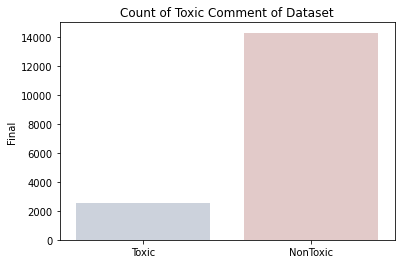

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(['Toxic', 'NonToxic'], df['Final'].map({0:"Non Toxic", 1: "Toxic"}).value_counts(ascending=True), alpha=0.8,palette="vlag")

plt.title('Count of Toxic Comment of Dataset')

In [142]:
from tensorflow.keras.layers import TextVectorization

In [143]:
X = df['Content']
y = df['Final']
WordSeg = []
for i in range(len(X)):
        sentence_strip = str(X[i]).strip()# Remove spaces at begin & end
        WordSeg.append(word_tokenize(sentence_strip, format='text')) # format text: add "_" where text is phrases.
X = pd.DataFrame(WordSeg) # Update new sentences
print(X)

                                                       0
0                                          VN cố lên nha
1                                            90 phút nữa
2      các cầu_thủ hãy cố_gắng da hết_mình nhé . nhất...
3                                        nhật ăn 3 : 0 r
4                                             1-0 cho vn
...                                                  ...
16798                                    đá vẫn chán lắm
16799                            vaooooooooooooooooooooo
16800                                           yeahhhhh
16801                     ghi_bàn rồi sẽ giải_toả tâm_lí
16802                      SUIIIIIIIIIIIIIIIIIIIIIIIIIII

[16803 rows x 1 columns]


In [144]:
MAX_FEATURES = 200000 # number of words in the vocab

In [145]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=50,
                               output_mode='int')

In [146]:
vectorizer.adapt(X.values)

In [147]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'đá',
 'vn',
 'thua',
 'quá',
 'trọngtài',
 'ko',
 'rồi',
 'này',
 'là',
 'mà',
 'có',
 'như',
 'thì',
 'đi',
 'lên',
 'vào',
 'hay',
 'gì',
 'nó',
 'chán',
 'thôi',
 'tài',
 'không',
 'cho',
 'thắng',
 'r',
 'mấy',
 'cố',
 'sao',
 'k',
 'việtnam',
 'thằng',
 'nam',
 'về',
 'thế',
 '1',
 'việt',
 'vậy',
 'cái',
 'bóng',
 'còn',
 'rập',
 '2',
 'ae',
 'đâu',
 'xem',
 'lứa',
 'nào',
 'ơi',
 'trận',
 'ăn',
 'lại',
 'bị',
 'Đá',
 'chắc',
 'ra',
 'linh',
 'cũng',
 '3',
 '0',
 'hết',
 '10',
 'các',
 'nữa',
 'anh',
 'đc',
 'toàn',
 'giờ',
 'ông',
 'chơi',
 'ngủ',
 'trong',
 'luôn',
 'ả',
 'câu',
 'được',
 'mình',
 'bắt',
 'con',
 'thấy',
 'nói',
 'làm',
 'hơn',
 'vôđịch',
 'kiểu',
 'j',
 'à',
 'mua',
 'chuyền',
 'qua',
 'mẹ',
 'ai',
 'u23',
 'lắm',
 'nay',
 'bọn',
 'da',
 '🇻',
 'đúng',
 'đã',
 'vô',
 'với',
 'v',
 'người',
 'đội',
 'vãi',
 'coi',
 'má',
 'tệ',
 'phải',
 'ngu',
 'em',
 'nhiều',
 'loại',
 'chân',
 'm',
 'tiến',
 'cả',
 'bạn',
 'nhìn',
 'đó',
 'cc',
 'số',
 'h',
 

In [148]:
vectorized_text = vectorizer(X.values)

In [149]:
num =int(input())  # Chọn stt của comment
print("Đoạn comment ban đầu: ")
print(X[0][num])
print()
print("Sau khi vector hóa: ")
print(vectorized_text[num])
print()
print("Kiểm tra lại: ")
for i in range(0,len(vectorized_text[num])):
  if(vectorized_text[num][i]!=0):
    print(vectorizer.get_vocabulary()[vectorized_text[num][i]],end=' ')

0
Đoạn comment ban đầu: 
VN cố lên nha

Sau khi vector hóa: 
tf.Tensor(
[  3  29  16 156   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)

Kiểm tra lại: 
vn cố lên nha 

In [150]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [151]:
batch_X , batch_y = dataset.as_numpy_iterator().next()

In [152]:
train = dataset.take(int(len(dataset)*.6))#Train set 60%
val = dataset.skip(int(len(dataset)*.6)).take(int(len(dataset)*.2))#Valuating set 20%
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))#Test set 20%

# 2. Create Sequential Model

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [154]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid'))

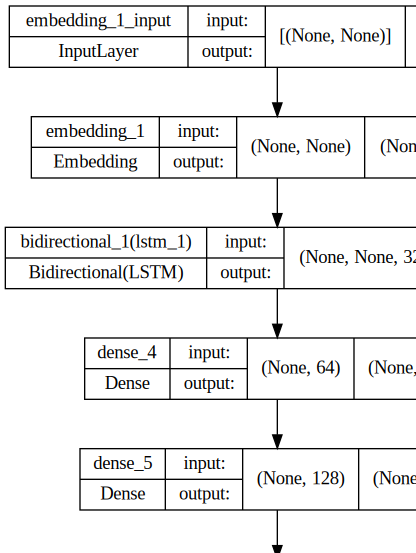

In [155]:
import keras
%matplotlib inline 

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_model.png')

# show model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [156]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [157]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                      

In [158]:
history = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
630/630 [==============================] - 73s 105ms/step - loss: 0.2892 - val_loss: 0.1560
Epoch 2/15
630/630 [==============================] - 68s 108ms/step - loss: 0.1582 - val_loss: 0.1082
Epoch 3/15
630/630 [==============================] - 66s 105ms/step - loss: 0.1166 - val_loss: 0.0835
Epoch 4/15
630/630 [==============================] - 66s 105ms/step - loss: 0.0953 - val_loss: 0.0864
Epoch 5/15
630/630 [==============================] - 67s 107ms/step - loss: 0.0783 - val_loss: 0.0713
Epoch 6/15
630/630 [==============================] - 66s 104ms/step - loss: 0.0648 - val_loss: 0.0559
Epoch 7/15
630/630 [==============================] - 66s 105ms/step - loss: 0.0658 - val_loss: 0.0662
Epoch 8/15
630/630 [==============================] - 66s 104ms/step - loss: 0.0598 - val_loss: 0.0430
Epoch 9/15
630/630 [==============================] - 65s 104ms/step - loss: 0.0536 - val_loss: 0.0442
Epoch 10/15
630/630 [==============================] - 65s 104ms/step - l

In [159]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

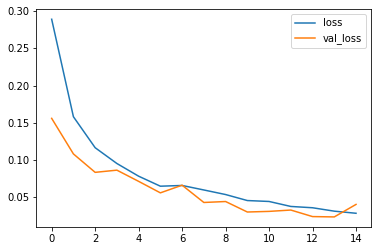

In [160]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [161]:
input_text = vectorizer(['tụi m giỏi thì vào mà đá, ở đó mà sủa ngu'])

In [162]:
print(input_text)

tf.Tensor(
[[295 117 247  14  17  11   2 149 122  11 849 112   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 50), dtype=int64)


In [163]:
res = model.predict(input_text)

In [164]:
print(res)

[[0.5155721]]


In [165]:
(res > 0.5).astype(int)

array([[1]])

In [166]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [167]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [168]:
res.shape

(1, 1)

In [169]:
input_text = vectorizer(['Việt Nam vô địch'])

In [170]:
print(input_text)

tf.Tensor(
[[  38   34  102 1152    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]], shape=(1, 50), dtype=int64)


In [171]:
res = model.predict(input_text)

In [172]:
print(res)

[[0.09227484]]


In [173]:
(res > 0.5).astype(int)

array([[0]])

In [174]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [175]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [176]:
res.shape

(1, 1)

In [177]:
input_text = vectorizer(['Việt Nam vô địt'])

In [178]:
print(input_text)

tf.Tensor(
[[ 38  34 102 694   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 50), dtype=int64)


In [179]:
res = model.predict(input_text)

In [180]:
print(res)

[[0.9985609]]


In [181]:
(res > 0.5).astype(int)

array([[1]])

In [182]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [183]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [184]:
res.shape

(1, 1)

In [185]:
input_text = vectorizer(['chửi chết nó đi anh em'])

In [186]:
print(input_text)

tf.Tensor(
[[249 228  20  15  66 113   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 50), dtype=int64)


In [187]:
res = model.predict(input_text)

In [188]:
print(res)

[[0.96117324]]


In [189]:
(res > 0.5).astype(int)

array([[1]])

In [190]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [191]:
(model.predict(batch_X) > 0.5).astype(int)

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [192]:
res.shape

(1, 1)

# 4. Evaluate Model

In [193]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [224]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [232]:
for batch in test.as_numpy_iterator(): 
  X_true, y_true = batch
  print("1 Comment trong 1 batch sau khi được vector hóa:")
  print(X_true[0])

  print("Nhãn của các comment trong batch:")
  print(y_true[0])

  print("Kết quả mà model predict được:")
  yhat = model.predict(X_true)
  print(yhat[0])
  break

1 Comment trong 1 batch sau khi được vector hóa:
[ 427 2746    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Nhãn của các comment trong batch:
0
Kết quả mà model predict được:
[0.00226063]


In [208]:
label = []
predict = []

for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    # print(batch)
    # print(len(batch[0]))
    X_true, y_true = batch
    # Make a prediction 
    # print(X_true)
    # print("Label: \n", y_true)
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    # print("Predict:\n", y_true)
    yhat = yhat.flatten()
    # print(yhat)
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    for i in y_true:
      label.append(i)
    for i in yhat:
      if i > 0.5:
        predict.append(1)
      else:
        predict.append(0)
      

In [209]:
# Nhãn ban đầu của tập test
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [210]:
# Kết quả mà mô hình dự đoán được
print(predict)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [220]:
toxic_in_test = 0
non_toxic_in_test = 0
toxic_predicted = 0
non_toxic_predicted = 0
for i in range(0,len(label)):
  if label[i] == 1:
    toxic_in_test+=1
  if label[i] == 0:
    non_toxic_in_test+=1
  if predict[i] == 1:
    toxic_predicted +=1
  if predict[i] == 0:
    non_toxic_predicted+=1

In [223]:
print("Số nhãn toxic trên tập test: ", toxic_in_test)
print("Số nhãn non-toxic trên tập test:",non_toxic_in_test)
print("Số nhãn predict toxic trên tập test: ",toxic_predicted)
print("Số nhãn predict non-toxic trên tập test: ",non_toxic_predicted)


Số nhãn toxic trên tập test:  501
Số nhãn non-toxic trên tập test: 2859
Số nhãn predict toxic trên tập test:  492
Số nhãn predict non-toxic trên tập test:  2868


In [198]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1 Score: {2*pre.result().numpy()*re.result().numpy()/(pre.result().numpy()+re.result().numpy())}, Accuracy:{acc.result().numpy()}')

Precision: 0.9678800702095032, Recall:0.9596602916717529, F1 Score: 0.9637526845830237, Accuracy:0.48571428656578064
